In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import gym 
import random
import matplotlib.pyplot as plt
from torch.autograd import Variable

from Visualisation import render_averages_plot, render_plot_with_hist
from SingleReplay import DQN

In [2]:
class ER(DQN):

    def replay(self, memory, size, gamma):
        if len(memory) >= size:
            states = []
            targets = []

            batch = random.sample(memory, size)

            for experience in batch:
                state, action, next_state, reward, done = experience
                states.append(state)
                q_vals = self.predict(state).tolist()
                if done:
                    q_vals[action] = reward
                else: 
                    q_vals_next = self.predict(next_state)
                    q_vals[action] = reward + gamma * torch.max(q_vals_next).item()
                targets.append(q_vals)
            self.update(states, targets)

In [3]:

def train(env, model, episodes, gamma, epsilon, decay, mem_size):
    final_reward = []
    memory = []
    epsilons = []
    exp = []
    
    goal_achieved = 0
    episode_num = 0

    for _ in range(episodes):
        episode_num += 1

        state = env.reset()
        done = False
        total = 0

        while not done:
            # should this be converted to a list? 
            q_values = model.predict(state)
            # print(q_values)

            if np.random.random() < epsilon:
                action = env.action_space.sample()
                exp.append("explore")
            else:
                action = torch.argmax(q_values).item()
                exp.append("exploit")

            next_state, reward, done, _ = env.step(action)
            # print(next_state)
            # print(action, q_values)
            # print(next_state[2])
            # if -0.05 < next_state[2] < 0.05:
            #     if -0.5 < next_state[0] < 0.5:
            #         reward *= 1.2
            #     else:
            #         reward *= 1.1
                
            # env.render()
            total += reward

                # break
            memory.append((state, action, next_state, reward, done))
            # if 25 is a list, this doesnt need to be computed again
            model.predict(state).tolist()
            model.replay(memory, mem_size, gamma)
            state = next_state

        epsilon = max(epsilon * decay, 0.01)
        epsilons.append(epsilon)
        final_reward.append(total)
        if total >= 200:
            goal_achieved += 1
        
        

        print("Episode number:", episode_num, "Reward:", total)
    # print(goal_achieved)
    return final_reward, goal_achieved, epsilons, exp

In [4]:
def average(runs, env, episodes):
    all_rewards = []
    successes = []

    for _ in range(runs):
        model = ER(obs_dim, action_dim, lr)
        rewards, goals, _, _ = train(env, model, episodes, gamma, epsilon, decay, 10)
        all_rewards.append(rewards)
        successes.append(goals)

    
    rewards_array = np.array([np.array(i) for i in all_rewards])
    return rewards_array, successes

In [5]:
episodes = 150
lr = 0.001

gamma = 0.9
epsilon = 0.3
decay = 0.99
UPDATE = 10



In [6]:
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

model = ER(obs_dim, action_dim, lr)

In [13]:

           
rewards, goals = train(env, model, episodes, gamma, epsilon, decay, 10)

%store rewards
%store goals


[ 0.0348076  -0.24208507  0.02231686  0.26740497]
0 tensor([-0.0212, -0.1015])
[ 0.0299659  -0.4375183   0.02766496  0.5670424 ]
0 tensor([-0.0003, -0.1430])
[ 0.02121553 -0.24279512  0.0390058   0.2832019 ]
1 tensor([ 0.0223, -0.1668])
[ 0.01635963 -0.43845108  0.04466984  0.5879274 ]
0 tensor([ 0.0005, -0.1440])
[ 0.00759061 -0.6341692   0.05642839  0.8943403 ]
0 tensor([ 0.0230, -0.1671])
[-0.00509278 -0.8300091   0.0743152   1.2042137 ]
0 tensor([ 0.0395, -0.1734])
[-0.02169296 -1.0260088   0.09839947  1.5192304 ]
0 tensor([ 0.0518, -0.1721])
[-0.04221313 -0.83220464  0.12878408  1.2588131 ]
1 tensor([ 0.0596, -0.1743])
[-0.05885723 -1.0287175   0.15396035  1.5888993 ]
0 tensor([ 0.0544, -0.1717])
[-0.07943158 -1.2252967   0.18573833  1.925366  ]
0 tensor([ 0.0615, -0.1746])
[-0.10393751 -1.0325906   0.22424565  1.6955724 ]
1 tensor([ 0.1565, -0.1420])
Episode number: 1 Reward: 11.0
[ 0.03640081 -0.19068295 -0.02018344  0.27856565]
0 tensor([ 0.0328, -0.0816])
[ 0.03258716 -0.38551

KeyboardInterrupt: 

In [8]:
%store -r rewards
%store -r goals

In [9]:
print(goals)

72


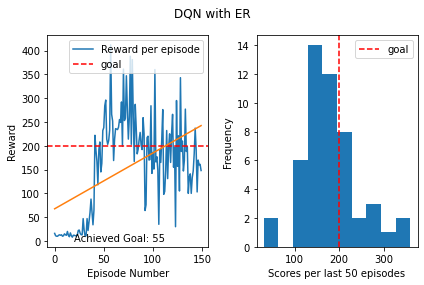

In [17]:
render_plot_with_hist(range(episodes), rewards, goals, "DQN with ER", True, "ERHist")

In [7]:
rewards_runs, goals_runs = average(3, env, episodes)

%store rewards_runs
%store goals_runs

/home/dylan/Documents/MSc/MSCDissertation/CartPole/SingleReplay.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  y_pred = self.nn(torch.Tensor(state))


Episode number: 1 Reward: 10.0
Episode number: 2 Reward: 11.0
Episode number: 3 Reward: 10.0
Episode number: 4 Reward: 8.0
Episode number: 5 Reward: 12.0
Episode number: 6 Reward: 11.0
Episode number: 7 Reward: 8.0
Episode number: 8 Reward: 12.0
Episode number: 9 Reward: 14.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 12.0
Episode number: 12 Reward: 10.0
Episode number: 13 Reward: 15.0
Episode number: 14 Reward: 17.0
Episode number: 15 Reward: 9.0
Episode number: 16 Reward: 10.0
Episode number: 17 Reward: 9.0
Episode number: 18 Reward: 12.0
Episode number: 19 Reward: 15.0
Episode number: 20 Reward: 32.0
Episode number: 21 Reward: 11.0
Episode number: 22 Reward: 10.0
Episode number: 23 Reward: 18.0
Episode number: 24 Reward: 13.0
Episode number: 25 Reward: 15.0
Episode number: 26 Reward: 13.0
Episode number: 27 Reward: 11.0
Episode number: 28 Reward: 9.0
Episode number: 29 Reward: 9.0
Episode number: 30 Reward: 9.0
Episode number: 31 Reward: 19.0
Episode number: 32 Reward

In [10]:
%store -r rewards_runs
%store -r goals_runs
print(np.mean(goals_runs))
print(goals_runs)

75.0
[68, 62, 95]


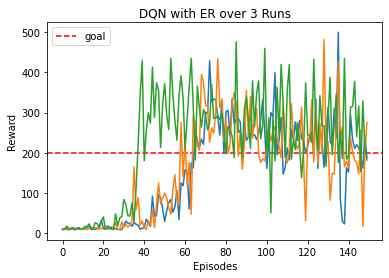

In [11]:
render_averages_plot(range(episodes), rewards_runs, "DQN with ER over 3 Runs", "ER3")

In [15]:
acheiveds = {}
for epsilon in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(epsilon)
    model = ER(obs_dim, action_dim, lr)
    _, achieved, epsilons, exp = train(env, model, episodes, gamma, epsilon, decay, 10)
    explore = exp.count("explore")
    exploit = exp.count("exploit")
    acheiveds[epsilon] = (achieved, epsilons, explore, exploit)
%store acheiveds
print(acheiveds)




    

0.3
Episode number: 1 Reward: 12.0
Episode number: 2 Reward: 10.0
Episode number: 3 Reward: 11.0
Episode number: 4 Reward: 9.0
Episode number: 5 Reward: 11.0
Episode number: 6 Reward: 8.0
Episode number: 7 Reward: 9.0
Episode number: 8 Reward: 11.0
Episode number: 9 Reward: 9.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 12.0
Episode number: 12 Reward: 10.0
Episode number: 13 Reward: 9.0
Episode number: 14 Reward: 13.0
Episode number: 15 Reward: 9.0
Episode number: 16 Reward: 13.0
Episode number: 17 Reward: 11.0
Episode number: 18 Reward: 12.0
Episode number: 19 Reward: 11.0
Episode number: 20 Reward: 10.0
Episode number: 21 Reward: 10.0
Episode number: 22 Reward: 12.0
Episode number: 23 Reward: 10.0
Episode number: 24 Reward: 15.0
Episode number: 25 Reward: 15.0
Episode number: 26 Reward: 16.0
Episode number: 27 Reward: 30.0
Episode number: 28 Reward: 17.0
Episode number: 29 Reward: 15.0
Episode number: 30 Reward: 10.0
Episode number: 31 Reward: 28.0
Episode number: 32 R

KeyboardInterrupt: 

In [14]:
x = range(len(acheiveds))
y = []
bar = []
exp = []
for key in acheiveds.keys():
    y.append(acheiveds[key][1])
    bar.append(acheiveds[key][0])
    exp.append((acheiveds[key][2], acheiveds[key][3]))
    
    
for i in range(len(y)):
    plt.plot(y[i])

plt.xlabel("Episodes")
plt.ylabel("Value of Epsilon")
plt.title("Rate of decay for different starting values of $\epsilon$")
plt.show()





NameError: name 'acheiveds' is not defined

In [79]:
print(bar)
print(acheiveds.keys())

[65, 91, 72, 71, 55]
dict_keys([0.3, 0.4, 0.5, 0.6, 0.7])


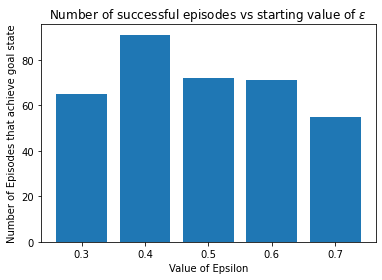

In [127]:
x_pos = [0, 1, 2, 3, 4]
plt.bar(x_pos, bar)
plt.xticks(x_pos, acheiveds.keys())
plt.xlabel("Value of Epsilon")
plt.ylabel("Number of Episodes that achieve goal state")
plt.title("Number of successful episodes vs starting value of $\epsilon$")
plt.show()


In [90]:
print(exp)

[(2840, 21549), (5466, 26717), (5175, 21457), (6262, 19343), (6438, 16001)]


In [13]:
explores = []
exploits = []

for i in range(len(exp)):
    explore, exploit = exp[i]
    explores.append(explore)
    exploits.append(exploit)

    
fig =plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(acheiveds.keys()))


ax.bar(X + 0.00, explores, color = 'b', width = 0.25, label="explore")
ax.bar(X + 0.25, exploits, color = 'r', width = 0.25, label="exploit")
plt.xticks(x_pos, acheiveds.keys())
plt.xlabel("Starting value of $\epsilon$")
plt.ylabel("Number of times agents explores/exploits")
plt.title("Bar chart of number of times agent explores/exploits for different starting values of $\epsilon$")
plt.show()

np.divide(exploits, explores)

NameError: name 'exp' is not defined

In [139]:
for x in exp:
    total = sum(x)
    print(x[0]/total, x[1]/total)

0.11644593874287588 0.8835540612571241
0.16984122052015038 0.8301587794798496
0.1943151096425353 0.8056848903574647
0.24456160906073032 0.7554383909392697
0.2869111814251972 0.7130888185748028


In [159]:
goals = {}
for mem in [5, 10, 15, 20, 25, 30]:
    print(mem)
    model = ER(obs_dim, action_dim, lr)
    _, achieved, _, _ = train(env, model, episodes, gamma, 0.4, decay, mem)
    goals[mem] = achieved

5
Episode number: 1 Reward: 14.0
Episode number: 2 Reward: 9.0
Episode number: 3 Reward: 15.0
Episode number: 4 Reward: 9.0
Episode number: 5 Reward: 9.0
Episode number: 6 Reward: 10.0
Episode number: 7 Reward: 9.0
Episode number: 8 Reward: 10.0
Episode number: 9 Reward: 13.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 11.0
Episode number: 12 Reward: 16.0
Episode number: 13 Reward: 10.0
Episode number: 14 Reward: 10.0
Episode number: 15 Reward: 12.0
Episode number: 16 Reward: 10.0
Episode number: 17 Reward: 11.0
Episode number: 18 Reward: 16.0
Episode number: 19 Reward: 20.0
Episode number: 20 Reward: 13.0
Episode number: 21 Reward: 29.0
Episode number: 22 Reward: 12.0
Episode number: 23 Reward: 18.0
Episode number: 24 Reward: 18.0
Episode number: 25 Reward: 8.0
Episode number: 26 Reward: 9.0
Episode number: 27 Reward: 12.0
Episode number: 28 Reward: 11.0
Episode number: 29 Reward: 9.0
Episode number: 30 Reward: 16.0
Episode number: 31 Reward: 26.0
Episode number: 32 Rewa

In [160]:
print(goals)

{5: 63, 10: 64, 15: 73, 20: 75, 25: 51, 30: 46}


[63, 64, 73, 75, 51, 46]
[0 1 2 3 4 5]


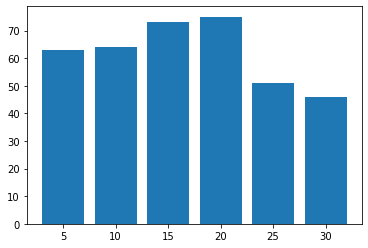

In [161]:
x = np.arange(len(goals.keys()))
successes = []

for key in goals.keys():
    successes.append(goals[key])
    
print(successes)
print(x)
plt.xticks(x, goals.keys())
plt.bar(x, successes)
plt.show()    

